Імпортуємо бібліотеки:

In [1]:
from parallelized_functions.Matrix import Matrix
from parallelized_functions.SeqMiniBatchGradientDescent import SeqMiniBatchGradientDescent
import matplotlib.pyplot as plt
import pandas as pd

Виконуємо експеримент в залежності від кількості вибірок:

In [4]:
if __name__ == '__main__':
    time_lst = []
    samples_lst = []
    for i in range(1, 11):
        n_samples = 5000 * i
        X = Matrix([[i * 2,
                     i + 5,
                     i - 10,
                     7 - i,
                     i * (-10)] for i in range(n_samples)])
        X, X_min, X_max = X.normalise()
        y = Matrix([[5 * X[i, 0] - 3 * X[i, 1] + 2 * X[i, 2] - X[i, 3] - 5 * X[i, 4] + 10] for i in range(n_samples)])
        y, y_min, y_max = y.normalise()
        num_iterations = 100
        seq_descent = SeqMiniBatchGradientDescent(X, y, learning_rate=0.4, num_iterations=num_iterations, batch_size=1024, stopping=1e-8, max_degree=1)
        time = seq_descent.optimize()
        time_lst.append(time)
        samples_lst.append(n_samples)

Sequential Mini-Batch Gradient Descent Progress:
[===============================================   ] 94%
Early Stopping on iteration 93

Executed in 4.068 seconds
Sequential Mini-Batch Gradient Descent Progress:
[===============================================   ] 95%
Early Stopping on iteration 94

Executed in 8.701 seconds
Sequential Mini-Batch Gradient Descent Progress:
[===============================================   ] 95%
Early Stopping on iteration 94

Executed in 13.021 seconds
Sequential Mini-Batch Gradient Descent Progress:
[===============================================   ] 95%
Early Stopping on iteration 94

Executed in 18.998 seconds
Sequential Mini-Batch Gradient Descent Progress:
[================================================  ] 96%
Early Stopping on iteration 95

Executed in 24.45 seconds
Sequential Mini-Batch Gradient Descent Progress:
[================================================  ] 96%
Early Stopping on iteration 95

Executed in 23.511 seconds
Sequential Mi

Візуалізуємо дані на графіку:

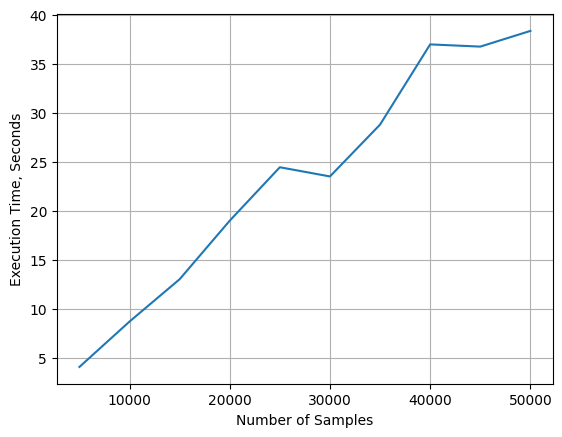

In [5]:
experiment_df = pd.DataFrame({'Execution Time': time_lst, 'Number of Samples': samples_lst})
plt.plot(experiment_df['Number of Samples'], experiment_df['Execution Time'])
plt.xlabel('Number of Samples')
plt.grid()
plt.ylabel('Execution Time, Seconds')
plt.show()

У таблиці:

In [6]:
experiment_df

,Execution Time,Number of Samples
0,4.068210,5000
1,8.701283,10000
2,13.021464,15000
3,18.997838,20000
4,24.450192,25000
5,23.511114,30000
6,28.802749,35000
7,36.990829,40000
8,36.763637,45000
9,38.365674,50000
